In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_all_images(imgs, color=False):
    fig=plt.figure(figsize=(18, 18))

    columns = 5
    rows = 1
    for i, img in zip(range(1, columns*rows +1), imgs):
        fig.add_subplot(rows, columns, i)
        if color:
            plt.imshow(img[:,:,::-1])
        else:
            plt.imshow(img, cmap = 'gray')

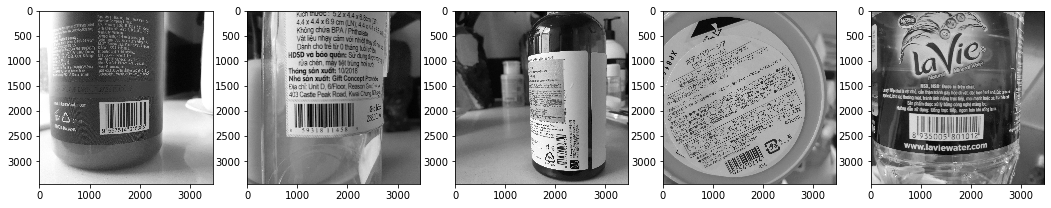

In [3]:
image = cv2.imread("01.jpg")
image2 = cv2.imread("02.jpg")
image3 = cv2.imread("03.jpg")
image4 = cv2.imread("04.jpg")
image5 = cv2.imread("05.jpg")

original_img = [image, image2, image3, image4, image5]

imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in original_img]
plot_all_images(imgs)

In [4]:
def sobel(gray):
    # compute the Scharr gradient magnitude representation of the images
    # in both the x and y direction
    gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
    gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)

    # subtract the y-gradient from the x-gradient
    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)
    return gradient

In [24]:
def find_and_draw_contours(tuple_img):
    img, original_img = tuple_img
    original_img = original_img.copy()
    (_, cnts, hierarchy) = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    c = sorted(cnts, key = cv2.contourArea, reverse = True)
    
    rect = cv2.minAreaRect(c[0])
    box = np.int0(cv2.boxPoints(rect))
#     print(box)
    boxs = [np.int0(cv2.boxPoints(cv2.minAreaRect(temp))) for temp in c]
    
    boxs2 = []
    thresholdRatioMin = 0.3
    thresholdRatioMax = 3.4
    x, y = img.shape
    
    for box in boxs:
        a, b, c, d = box
        a1, a2  = a
        b1, b2 = b
        c1, c2 = c
        d1, d2 = d
        temp_arr = [a2, b2, c2, d2]
        if(a1 < 0 or a2 < 0 or b1 < 0 or b2 < 0):
            continue
            
        ratio = abs(a2 - d2) / abs(a1 - b1)
        if ratio > thresholdRatioMax or ratio < thresholdRatioMin:
            continue
        if ratio > 0.7 and ratio < 1.53:
            continue
            
        if(min(temp_arr) > x/2):
            boxs2 = boxs2 + [box]
        
#     temp_abc =boxs2[:3]
#     temp_res = [abs(a2 - d2) / abs(a1 - b1) for ((a1, a2), (b1, b2), (c1, c2), (d1, d2)) in temp_abc]
#     temp_res = [ temp if (temp > 1) else (1/temp) for temp in temp_res]
#     print(temp_res)
    cv2.drawContours(original_img, boxs2[:3], -1, (0, 255, 0), 5)
    return original_img

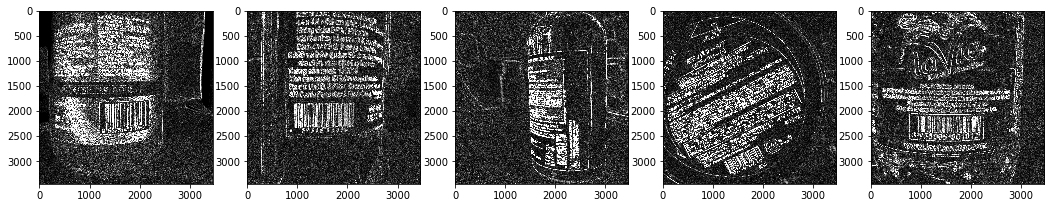

In [6]:
sobel_imgs = [sobel(img) for img in imgs]
plot_all_images(sobel_imgs)

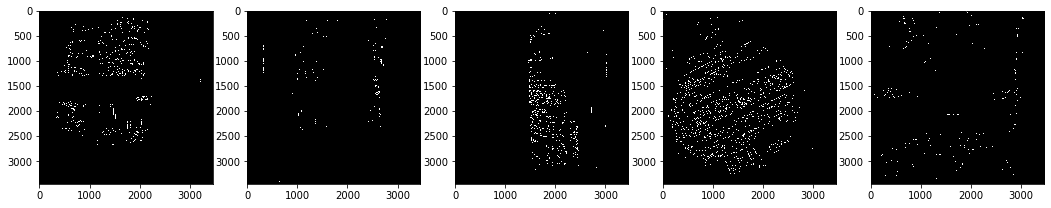

In [7]:
canny_imgs = [cv2.Canny(img, 110, 220)  for img in imgs]
plot_all_images(canny_imgs)

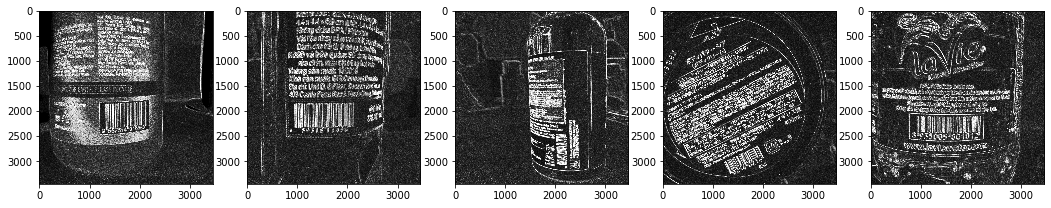

In [8]:
blurred_imgs = [cv2.blur(gradient, (3, 3)) for gradient in sobel_imgs]
plot_all_images(blurred_imgs)

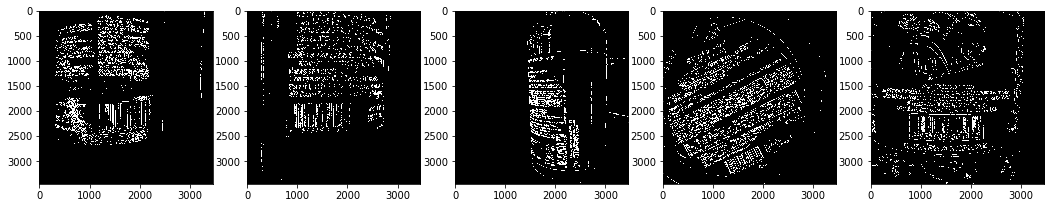

In [9]:
thresh_imgs = [cv2.threshold(blurred, 200, 250, cv2.THRESH_BINARY) for blurred in blurred_imgs]
thresh_imgs = [thresh for (_, thresh) in thresh_imgs]
plot_all_images(thresh_imgs)

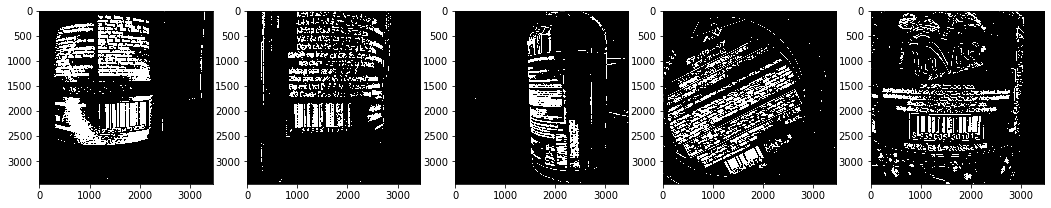

In [10]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed_imgs = [cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel) for thresh in thresh_imgs]
plot_all_images(closed_imgs)

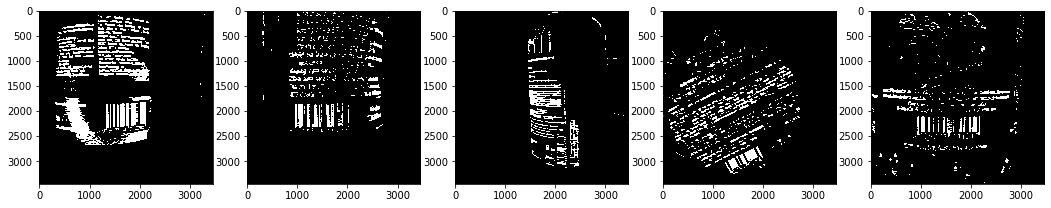

In [11]:
erode_imgs = [cv2.erode(closed, None, iterations = 5) for closed in closed_imgs]
plot_all_images(erode_imgs)

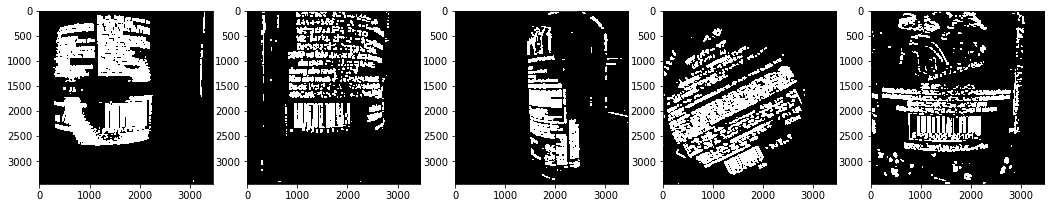

In [12]:
dilate_imgs = [cv2.dilate(erode, None, iterations = 13) for erode in erode_imgs]
# dilate_imgs = erode_imgs
plot_all_images(dilate_imgs)

/home/anhdh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in long_scalars
/home/anhdh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[1.5454545454545454, nan, nan]
[1.7999999999999998, 1.5, 2.0]
[2.0, 3.0, 3.1574074074074074]
[2.27027027027027, 2.0714285714285716, 3.328767123287671]
[1.5789473684210527, nan, 2.9285714285714284]


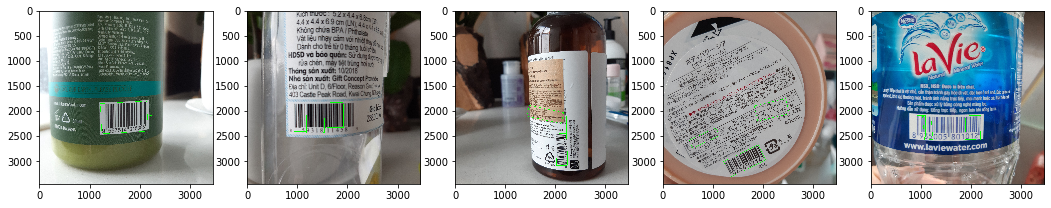

In [23]:
final_imgs = [find_and_draw_contours(img) for img in zip(dilate_imgs, original_img)]
plot_all_images(final_imgs, True)
for t, img in enumerate(final_imgs):
    cv2.imwrite(f"ahihih-{t+1}.jpg", img)